In this notebook i will be explaining how to scrape data from steam website . We can also use it to scrape data from any other website . I am posting this notebook so as to help others as i had some problems figuring out that - most efficienct way to scrape data online . I tried many plugins , extensions but eventually I found writing my own script to be super efficient , powerful with a greater control overall . 

Please upvote my notebook if you found it helpful ! 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Here i  would like to import urllib and bs4 packages . Both are really helpfull to scrap out data direct from web with ease . urllib is a really good http client for
# python providing many advantages of its own . Beautifulsoup is a html parser and makes our really easy and simple . 

from urllib.request import urlopen
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 999

### Source Links 

In [ ]:
# Following are the links from which i will scrape data . urlopen is used to create a http request and response is been saved in open_link variables  
open_link_cpu = urlopen('https://store.steampowered.com/hwsurvey/cpus/').read()
open_link_gpu = urlopen('https://store.steampowered.com/hwsurvey/videocard/').read()
open_link_cpu_frequency = urlopen('https://store.steampowered.com/hwsurvey/processormfg/').read() 

# CPU

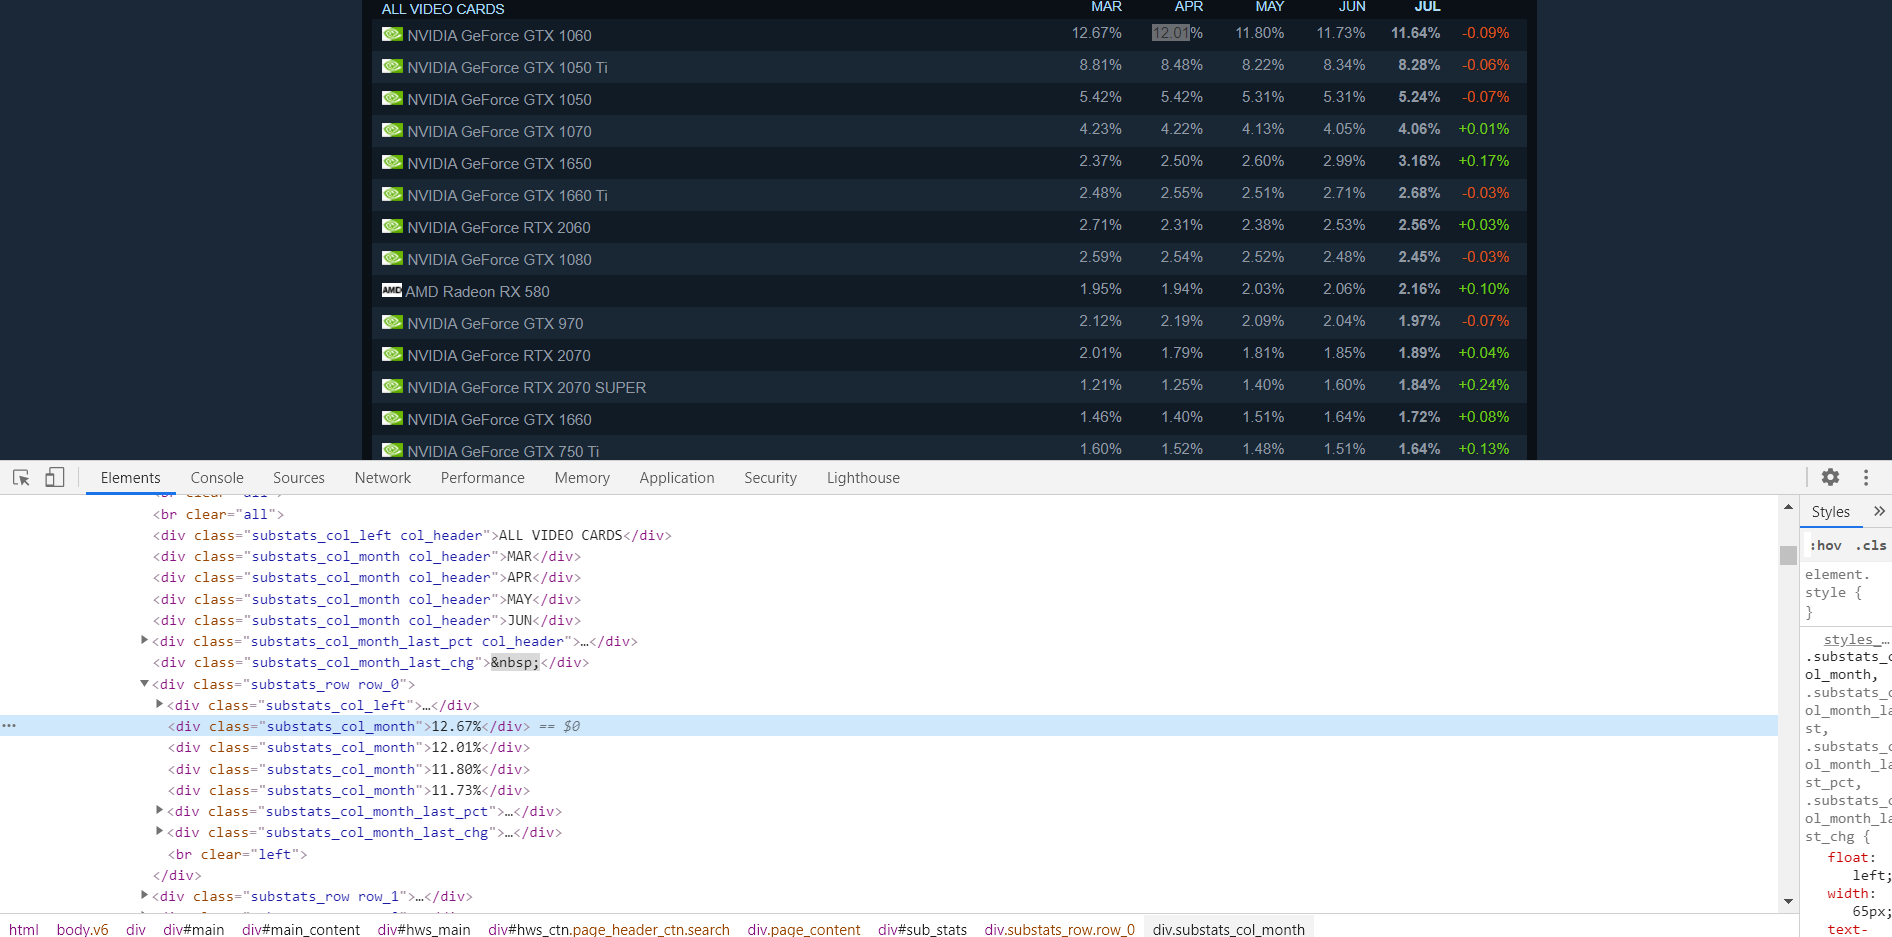

Here as we can see the data we need it present inside div tags and with specified class namely - 
- substats_col_left col_header    
- substats_col_left
- substats_col_month
- substats_col_month_last_pct
- substats_col_month_last_chg

In [ ]:
# soup variable is used to store parsed content from the response of http request . 
soup=BeautifulSoup(open_link_cpu, "html.parser")

# find_all() method finds all the html element with specified tag as arguments .
# for e.g here after inspecting steam website in browser we will store all the as bs4.element.ResultSet in the following variables
category_col = soup.find_all('div' , class_ = 'substats_col_left col_header')
substats_col_left = soup.find_all('div' , class_ = 'substats_col_left')
substats_col_month = soup.find_all('div' , class_ = 'substats_col_month')
substats_col_month_last_pct = soup.find_all('div' , class_ = 'substats_col_month_last_pct')
substats_col_month_last_chg = soup.find_all('div' , class_ = 'substats_col_month_last_chg')

In [ ]:
# Here using .text method we will extract text information safed in each of the div tags and safe them in individual lists using list comprehension .

os_type = [ item.text for item in category_col]
jul = [item.text for item in substats_col_month_last_pct]
type_of_cpu = [ item.text for item in substats_col_left]
pct_chng = [ item.text for item in substats_col_month_last_chg]

In [ ]:
# Since our soup variable - substats_col_month contains values for each of the 4 months i.e march , april , may , june we will itearate a loop to 
# to save values their respective variables .
mar=[]
apr=[]
may=[]
jun=[]

i=0
for item in substats_col_month:
    if i % 4 == 0:
        mar.append(item.text)
        i += 1
    elif i % 4 == 1:
        apr.append(item.text)
        i += 1
    elif i % 4 == 2:
        may.append(item.text)
        i += 1
    elif i % 4 == 3:
        jun.append(item.text)
        i += 1

In [ ]:
# This variable is been personally added by me to somewhat a little preprocessing before utilizing this data set .   

os = []

i=0
for item in os_type :
    if i == 0  :
        for j in range(0,21):
            os.append('WINDOWS')
        i += 1
    elif i == 1:
        for j in range(21,32):
            os.append('OSX')
        i += 1
    elif i == 2:
        for j in range(32,52):
            os.append('LINUX')
        i += 1

In [ ]:
# Defining a dataset and then saving it to csv format in a output file which i will put up as a seprate dataset on kaggle .

pc_physical_details_cpu = pd.DataFrame({'CPU CORES':type_of_cpu,
                                        'OS':os,
                                        'MAR': mar,
                                        'APR': apr,
                                        'MAY': may,
                                        'JUN': jun,
                                        'JUL': jul,
                                        '% CHANGE':pct_chng})

pc_physical_details_cpu.drop([0,24,35], axis = 0, inplace = True)
pc_physical_details_cpu.reset_index(drop=True , inplace = True)
pc_physical_details_cpu.to_csv('D:\DataScience\datasets\cpu_cores.csv')

Similarly we will be creating other data sets for cpu frequency , gpu , gpu-directx classification .


# GPU

In [ ]:
soup=BeautifulSoup(open_link_gpu, "html.parser")
category_col = soup.find_all('div' , class_ = 'substats_col_left col_header')
substats_col_left = soup.find_all('div' , class_ = 'substats_col_left')
substats_col_month = soup.find_all('div' , class_ = 'substats_col_month')
substats_col_month_last_pct = soup.find_all('div' , class_ = 'substats_col_month_last_pct')
substats_col_month_last_chg = soup.find_all('div' , class_ = 'substats_col_month_last_chg')

In [ ]:
category = [ item.text for item in category_col]
jul = [item.text for item in substats_col_month_last_pct]
gpu_name = [ item.text for item in substats_col_left]
pct_chng = [ item.text for item in substats_col_month_last_chg]

In [ ]:
mar=[]
apr=[]
may=[]
jun=[]

i=0
for item in substats_col_month:
    if i % 4 == 0:
        mar.append(item.text)
        i += 1
    elif i % 4 == 1:
        apr.append(item.text)
        i += 1
    elif i % 4 == 2:
        may.append(item.text)
        i += 1
    elif i % 4 == 3:
        jun.append(item.text)
        i += 1
        

In [ ]:
directx = []

i=0
for item in category :
    if i == 0  :
        for j in range(0,64):
            directx.append('DIRECTX 12 GPUS')
        i += 1
    elif i == 1:
        for j in range(64,98):
            directx.append('DIRECTX 11 GPUS')
        i += 1
    elif i == 2:
        for j in range(98,137):
            directx.append('DIRECTX 10 GPUS')
        i += 1
    elif i == 3:
        for j in range(137,175):
            directx.append('DIRECTX 9 SHADER MODEL 2B AND 3.0 GPUS')
        i += 1
    elif i == 4:
        for j in range(175,189):
            directx.append('DIRECTX 9 SHADER MODEL 2.0 GPUS')
        i += 1
        

In [ ]:
combined_data_gpu = pd.DataFrame({'GPU NAME':gpu_name,
                                        'MAR': mar,
                                        'APR': apr,
                                        'MAY': may,
                                        'JUN': jun,
                                        'JUL': jul,
                                        '% CHANGE':pct_chng})

combined_data_gpu


In [ ]:
pc_physical_details_gpu , directx_distribution = combined_data_gpu[8:106] , combined_data_gpu[107:]
pc_physical_details_gpu.reset_index(drop = True , inplace = True)
pc_physical_details_gpu.to_csv('D:\DataScience\datasets\gpu.csv')

In [ ]:
col = ['GPU NAME','DIRECTX', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', '% CHANGE']
directx_distribution['DIRECTX'] = directx
directx_distribution=directx_distribution[col]
directx_distribution.drop([171,205,244,282],axis = 0 , inplace = True)
directx_distribution.reset_index(drop = True , inplace = True)
directx_distribution.to_csv('D:\DataScience\datasets\gpu_directx.csv')

### CPU FREQUENCY

In [ ]:
soup=BeautifulSoup(open_link_cpu_frequency, "html.parser")
category_col = soup.find_all('div' , class_ = 'substats_col_left col_header')
substats_col_left = soup.find_all('div' , class_ = 'substats_col_left')
substats_col_month = soup.find_all('div' , class_ = 'substats_col_month')
substats_col_month_last_pct = soup.find_all('div' , class_ = 'substats_col_month_last_pct')
substats_col_month_last_chg = soup.find_all('div' , class_ = 'substats_col_month_last_chg')

In [ ]:
category = [ item.text for item in category_col]
jul = [item.text for item in substats_col_month_last_pct]
cpu_frequency = [ item.text for item in substats_col_left]
pct_chng = [ item.text for item in substats_col_month_last_chg]

In [ ]:
mar=[]
apr=[]
may=[]
jun=[]

i=0
for item in substats_col_month:
    if i % 4 == 0:
        mar.append(item.text)
        i += 1
    elif i % 4 == 1:
        apr.append(item.text)
        i += 1
    elif i % 4 == 2:
        may.append(item.text)
        i += 1
    elif i % 4 == 3:
        jun.append(item.text)
        i += 1


In [ ]:
manufacturer =[]
os=[]
i=0
for item in category :
    if i == 0  :
        for j in range(0,14):
            manufacturer.append('INTEL')
        i += 1
    elif i == 1:
        for j in range(14,25):
            manufacturer.append('AMD')
        i += 1
    elif i == 2:
        for j in range(25,39):
            manufacturer.append('INTEL')
        i += 1
    elif i == 3:
        for j in range(39,50):
            manufacturer.append('INTEL')
        i += 1
    elif i == 4:
        for j in range(50,61):
            manufacturer.append('AMD')
        i += 1
i=0     
for i in [1,2,3]:
    if i == 1:
        for j in range(0,25):
            os.append('WINDOWS')
    if i == 2:
        for j in range(25,39):
            os.append('OSX')
    if i == 3:
        for j in range(39,61):
            os.append('LINUX')

In [ ]:
cpu_frequency_ = pd.DataFrame({'CPU FREQUENCY':cpu_frequency,
                               'MANUFACTURER': manufacturer,
                                                    'OS':os,
                                                 'MAR': mar,
                                                 'APR': apr,
                                                 'MAY': may,
                                                 'JUN': jun,
                                                 'JUL': jul,
                                        '% CHANGE':pct_chng})

cpu_frequency_.drop([0,1,2,3,14,25,36,37,38,39,50] , axis = 0 , inplace = True)
cpu_frequency_.reset_index(drop = True , inplace = True)
cpu_frequency_.to_csv('D:\DataScience\datasets\cpu_frequency.csv')